In [1]:
import matplotlib.pyplot as plt
import numpy as np

import sys
import os
sys.path.append(os.path.abspath('../..'))
from Paper.figure_scripts import common

In [ ]:
def phi(a):
    return np.minimum(1, a)

def Delta(s, eps):
    return np.abs(phi(s) - phi(s * np.exp(eps)))

def Delta2(s, eps):
    return Delta(s,eps) - s*np.abs(1 -  np.exp(eps))

def Delta3(s, eps):
    return Delta(s,eps) - (1 -  np.exp(-np.abs(eps)))

In [3]:
gran = 3
s_vals = np.logspace(-4, 2, 400)
eps_vals = np.linspace(0., gran, 400)
S, EPS = np.meshgrid(s_vals, eps_vals)
D = Delta(S, EPS)

Text(0, 0.5, '$\\varepsilon(x,y)$')

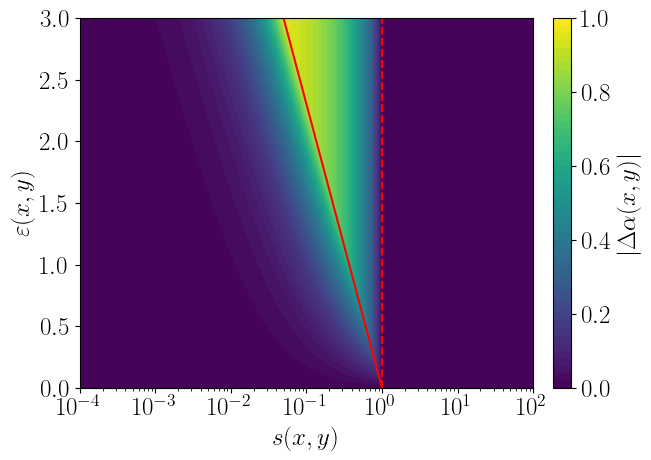

In [7]:
fig, ax = plt.subplots()
levels = np.linspace(0, 1, 51)

contour = plt.contourf(
    S, EPS, D,
    levels=levels,
    cmap="viridis",
    vmin=0, vmax=1,
    zorder=-1
)

ax.plot(s_vals, -np.log(s_vals), color="red", zorder=1)
ax.axvline(1.0, color="red", ls="--", zorder=1)

cbar = plt.colorbar(
    contour, ax=ax,
    fraction=0.046, pad=0.04
)
cbar.set_label(r"$|\Delta \alpha(x,y)|$")
cbar.set_ticks(np.linspace(0, 1, 6))

ax.set_xscale("log")
ax.set_ylim(0, gran)
ax.set_xlabel(r"$s(x,y)$")
ax.set_ylabel(r"$\varepsilon(x,y)$")